<a href="https://colab.research.google.com/github/mathewdavid/maths_data_science/blob/main/Kyphosis_disease_dataset_Data_Wrangling_and_EDA_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- In this project, we will perform basic Exploratory Data Analysis (EDA) on the Kyphosis disease Dataset. 
- Kyphosis is an abnormally excessive convex curvature of the spine. 
- Dataset contains 81 rows and 4 columns representing data on children who have had corrective spinal surgery. 
    - INPUTS: 1. Age: in months, 2. Number: the number of vertebrae involved, 3. Start: the number of the first (topmost) vertebra operated on.
    - OUTPUTS: Kyphosis which represents a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.
- Using the “kyphosis.csv", write a python script to perform the following tasks:
    1. Import the “kyphosis.csv" file using Pandas
    2. Perform basic Exploratory Data Analysis (EDA) on the data       
    3. List the average, minimum and maximum age (in years) considered in this study using 2 methods
    4. Plot the correlation matrix 
    5. Convert the age column datatype from int64 to float64
    6. Define a function that converts age from months to years 
    7. Apply the function to the “Age” column and add the results into a new column entitled “Age in Years” 
    8. What are the features of the oldest and youngest child in this study?
    9. Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check.

In [1]:
# Importing required libraries

import pandas as pd

In [2]:
kyp_df = pd.read_csv('kyphosis.csv')

In [4]:
kyp_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
kyp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
kyp_df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


In [7]:
kyp_df.tail(10)

,Kyphosis,Age,Number,Start
71,absent,127,4,12
72,absent,87,4,16
73,absent,206,4,10
74,absent,11,3,15
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [8]:
kyp_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [9]:
kyp_df['Age'].mean()/12

6.97119341563786

In [10]:
kyp_df['Age'].min()/12

0.08333333333333333

In [11]:
kyp_df['Age'].max()/12

17.166666666666668

In [12]:
kyp_df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

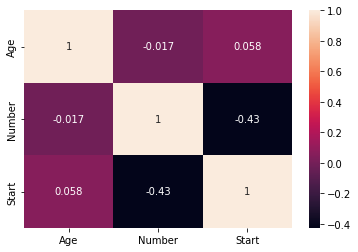

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(kyp_df.corr(), annot=True);

In [14]:
kyp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [15]:
# Let's convert the Age datatype from int64 to float64

kyp_df['Age'] = kyp_df['Age'].astype('float64')
kyp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Kyphosis  81 non-null     object 
 1   Age       81 non-null     float64
 2   Number    81 non-null     int64  
 3   Start     81 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.7+ KB


In [16]:
# Creating a function to convert Age from months to years

def month_to_year(age):
  return age/12

In [17]:
# Applying function to the DataFrame

kyp_df['Age_in_Years'] = kyp_df['Age'].apply(month_to_year)
kyp_df

,Kyphosis,Age,Number,Start,Age_in_Years
0,absent,71.0,3,5,5.916667
1,absent,158.0,3,14,13.166667
2,present,128.0,4,5,10.666667
3,absent,2.0,5,1,0.166667
4,absent,1.0,4,15,0.083333
...,...,...,...,...,...
76,present,157.0,3,13,13.083333
77,absent,26.0,7,13,2.166667
78,absent,120.0,2,13,10.000000
79,present,42.0,7,6,3.500000


In [18]:
# Getting the maximum age child
kyp_df[kyp_df['Age'] == kyp_df['Age'].max()]

,Kyphosis,Age,Number,Start,Age_in_Years
73,absent,206.0,4,10,17.166667


In [19]:
# Getting the minimum age child
kyp_df[kyp_df['Age'] == kyp_df['Age'].min()]

,Kyphosis,Age,Number,Start,Age_in_Years
4,absent,1.0,4,15,0.083333
5,absent,1.0,2,16,0.083333
13,absent,1.0,4,12,0.083333
15,absent,1.0,3,16,0.083333
36,absent,1.0,3,9,0.083333


In [20]:
# Normalisation is conducted to make feature values range from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
kyp_df['Age'] = scaler.fit_transform(kyp_df['Age'].values.reshape(-1,1))

In [22]:
kyp_df.describe()

,Age,Number,Start,Age_in_Years
count,81.000000,81.000000,81.000000,81.000000
mean,0.403192,4.049383,11.493827,6.971193
std,0.283435,1.619423,4.883962,4.842021
min,0.000000,2.000000,1.000000,0.083333
25%,0.121951,3.000000,9.000000,2.166667
50%,0.419512,4.000000,13.000000,7.250000
75%,0.629268,5.000000,16.000000,10.833333
max,1.000000,10.000000,18.000000,17.166667


In [24]:
# Standardisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kyp_df['Age'] = scaler.fit_transform(kyp_df['Age'].values.reshape(-1,1))

In [25]:
kyp_df.describe().round(2)

,Age,Number,Start,Age_in_Years
count,81.00,81.00,81.00,81.00
mean,0.00,4.05,11.49,6.97
std,1.01,1.62,4.88,4.84
min,-1.43,2.00,1.00,0.08
25%,-1.00,3.00,9.00,2.17
50%,0.06,4.00,13.00,7.25
75%,0.80,5.00,16.00,10.83
max,2.12,10.00,18.00,17.17
